# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df_estates = pd.read_csv('assets/real_estate.csv', sep=';')
df_estates

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [22]:
###Imprimir dirección de la casa más cara###

def HighPrice(highprice):
    #Cogemos el valor más grande de la columna Price (El ultimo en este caso) y lo convertimos en una Serie con squeeze para trabajarlo mejor.
    highprice_house = highprice.sort_values('price').tail(1).squeeze()
    print (f"La casa con dirección {highprice_house['address']},{highprice_house['level5']} es la más cara y su precio es de {highprice_house['price']} €.")

print (HighPrice(df_estates))

La casa con dirección El Escorial,El Escorial es la más cara y su precio es de 8500000 €.
None


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [26]:
###Imprimir dirección de la casa más cara###

def LowPrice(lowprice):
    lowprice_house = lowprice.sort_values('price').head(1).squeeze()
    print (f"La casa con dirección en {lowprice_house['address']}, {lowprice_house['level5']} es la más barata y su precio es de {lowprice_house['price']} €.")

print (LowPrice(df_estates))

La casa con dirección en  Madrid Capital,  Madrid Capital es la más barata y su precio es de 0 €.
None


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [32]:
###Imprimimos la casa más grande y la más pequeña###

def MoreSurface(moresurface):
    moresurface_house = moresurface.sort_values('surface').tail(1).squeeze()
    print (f"La casa más grande está en {moresurface_house['address']}, {moresurface_house['level5']} y su superficie es de {moresurface_house['surface']} metros.")

def LessSurface(lesssurface):
    lessfurface_house = lesssurface.sort_values('surface').head(1).squeeze()
    print (f"La casa más pequeña está en {lessfurface_house['address']}, {lessfurface_house['level5']} y su superficie es de {lessfurface_house['surface']} metros.")

print (MoreSurface(df_estates))
print (LessSurface(df_estates))

La casa más grande está en Calle de Manuela Malasaña,  Madrid Capital,  Madrid Capital y su superficie es de nan metros.
None
La casa más pequeña está en Calle Amparo,  Madrid Capital,  Madrid Capital y su superficie es de 15.0 metros.
None


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [62]:
###Nombre de las poblaciones###

def Populations(populations):
    counter = len(populations.level5)
    list_populations = list()
    for i in range(counter):
        list_populations.append(populations.level5[i])
    
    #Agrupamos los valores únicos.
    list_populations = np.unique(list_populations)
    
    return list_populations

print(Populations(df_estates))

[' Madrid Capital' 'Ajalvir' 'Alcalá de Henares' 'Alcobendas' 'Alcorcón'
 'Aldea del Fresno' 'Algete' 'Alpedrete' 'Ambite' 'Anchuelo' 'Aranjuez'
 'Arganda del Rey' 'Arroyomolinos (Madrid)' 'Batres'
 'Becerril de la Sierra' 'Belmonte de Tajo' 'Boadilla del Monte' 'Braojos'
 'Brea de Tajo' 'Brunete' 'Buitrago del Lozoya' 'Bustarviejo'
 'Cabanillas de la Sierra' 'Cadalso de los Vidrios'
 'Camarma de Esteruelas' 'Campo Real' 'Canencia' 'Carabaña'
 'Casarrubuelos' 'Cenicientos' 'Cercedilla' 'Chapinería' 'Chinchón'
 'Ciempozuelos' 'Cobeña' 'Collado Mediano' 'Collado Villalba'
 'Colmenar Viejo' 'Colmenar de Oreja' 'Colmenar del Arroyo' 'Colmenarejo'
 'Corpa' 'Coslada' 'Cubas de la Sagra' 'Daganzo de Arriba' 'El Atazar'
 'El Berrueco' 'El Boalo - Cerceda – Mataelpino' 'El Escorial'
 'El Molar (Madrid)' 'El Vellón' 'El Álamo' 'Estremera'
 'Fresnedillas de la Oliva' 'Fresno de Torote'
 'Fresno de Torote - Serracines' 'Fuenlabrada' 'Fuente El Saz de Jarama'
 'Fuentidueña de Tajo' 'Galapagar' 'Gar

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [13]:
### Comprobar si hay valores no admitidos en la lista ###

def NanIdentificy(value):
    print (value.isnull().any())
    print (value.isnull().any(axis=1)) #Axis 1 Columnas

print (NanIdentificy(df_estates))

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool
0        True
1        Tru

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [60]:
### Eliminar los NAs del dataset###

def Filter(value):
   df_filter = value.dropna(axis=1)
   return df_filter

print(Filter(df_estates))

       Unnamed: 0  id_realEstates  isNew  \
0               1       153771986  False   
1               2       153867863  False   
2               3       153430440  False   
3               4       152776331  False   
4               5       153180188  False   
...           ...             ...    ...   
15330       15331       153901377  False   
15331       15332       150394373  False   
15332       15333       153901397  False   
15333       15334       152607440  False   
15334       15335       153901356  False   

                                            url_inmueble   price  \
0      https://www.fotocasa.es/es/comprar/vivienda/ma...  195000   
1      https://www.fotocasa.es/es/comprar/vivienda/ma...   89000   
2      https://www.fotocasa.es/es/comprar/vivienda/ma...  390000   
3      https://www.fotocasa.es/es/comprar/vivienda/ma...   89000   
4      https://www.fotocasa.es/es/comprar/vivienda/ma...  172000   
...                                                  ...     ..

#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [61]:
###Media de precios de Arroyomolinos###

def MeanPrice(dataset, city):
    dataset_city = dataset[dataset['level5'] == city]
    return dataset_city.price.mean()

print (MeanPrice(df_estates, "Arroyomolinos (Madrid)"))

294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


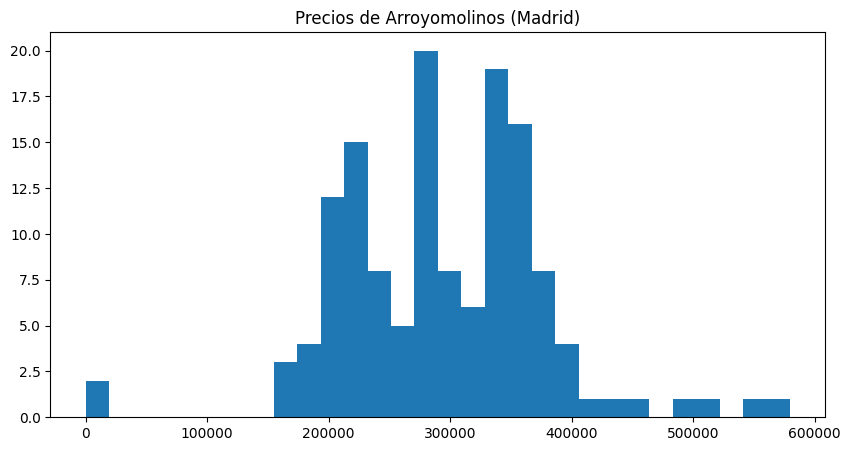

None


In [62]:
###Historiograma de los precios de Arroyomolinos###

def HistogramPriceArroyomolinos(dataset):
    arroyomolinos = dataset[dataset['level5'] == "Arroyomolinos (Madrid)"]
    plt.figure (figsize=(10,5))
    plt.hist (arroyomolinos.price, bins=30, alpha=1)
    plt.title ("Precios de Arroyomolinos (Madrid)")
    plt.show()

print (HistogramPriceArroyomolinos(df_estates))

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [63]:
###Comprobar si el precio promedio de Valdemorillo y de Galapagar son el mismo###

print (MeanPrice(df_estates,"Valdemorillo"))
print (MeanPrice(df_estates,"Galapagar"))
print (MeanPrice(df_estates,"Valdemorillo") == MeanPrice(df_estates,"Galapagar"))

363860.2931034483
360063.20238095237
False


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [64]:
###Comprobar si el precio/m2 promedio de Valdemorillo y Galapagar son el mismo###

def ColumnPPS(dataset):
    pps = dataset.price / dataset.surface
    dataset ['pps'] = pps
    return dataset

dfwith_pps = ColumnPPS(df_estates)

def MeanPPS(dataset, city):
    pps_datasetCity = dataset[dataset['level5'] == city]
    return pps_datasetCity.pps.mean()

print (MeanPPS(dfwith_pps, "Valdemorillo"))
print (MeanPPS(dfwith_pps, "Galapagar"))
print (MeanPPS(dfwith_pps,"Valdemorillo") == MeanPPS(dfwith_pps,"Galapagar"))

1317.9502109024986
1606.3240303094024
False


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

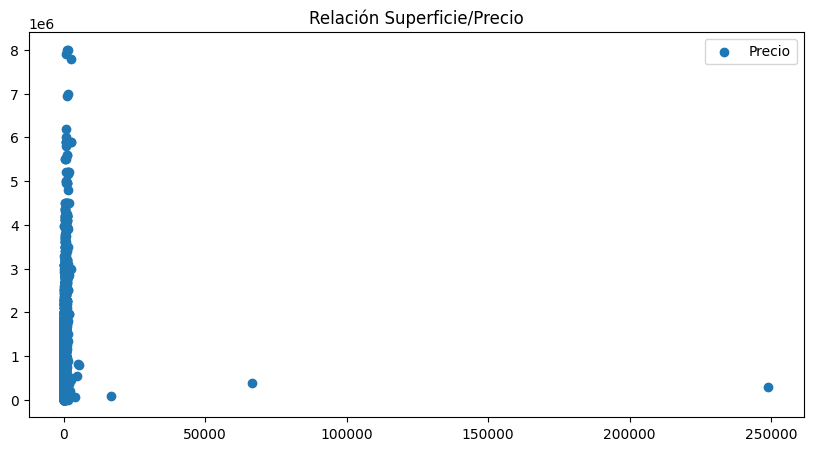

None


In [66]:
def RelPriceSurface(dataset): #SIN ACABAR
    plt.figure(figsize=(10,5))
    plt.scatter(dataset.price, dataset.surface, label = "Precio")

    plt.title("Relación Superficie/Precio")
    plt.legend()
    plt.show()

print (RelPriceSurface(df_estates))

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [69]:
###Buscamos cuantas agencias contiene el DataSet###
def HowManyRealEstatesAre(value):
    return len(value.id_realEstates.unique()) #Imprimimos solamente los valores unicos.

print (HowManyRealEstatesAre(df_estates))

14217


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [75]:
def HowCityHaveMoreHouses(df):
    return df.level5.value_counts().head(1) #Aquí contamos las veces que un valor se repite y cogemos el primero

print (HowCityHaveMoreHouses(df_estates))

level5
Madrid Capital    6643
Name: count, dtype: int64


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [76]:
###Creamos un nuevo DataFrame que contenga Fuenlabrada, Leganes, Getafe y Alcorcón"###

def CinturonSur(dataset):
    filt_cinturonSur =dataset['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])
    new_dataset = dataset[filt_cinturonSur]
    return new_dataset

cinturonsur = CinturonSur(df_estates)
print (cinturonsur)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

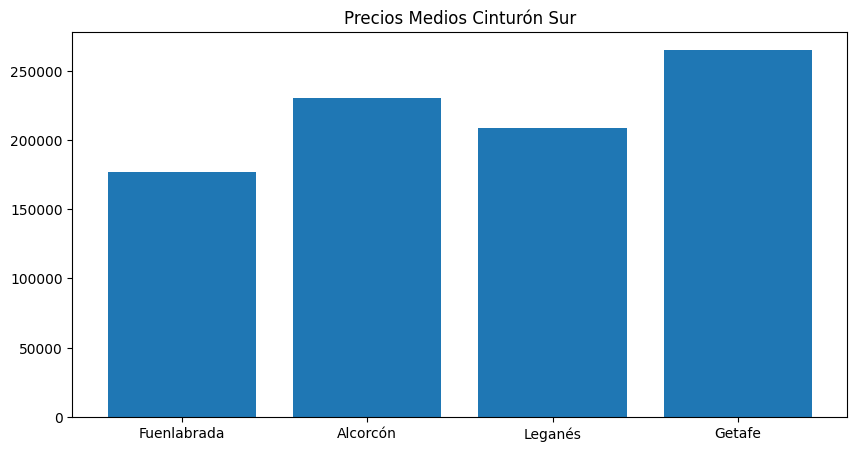

None


In [80]:
###Grafico de barra de la mediana de los precios de Cinturon Sur###

def CinturonSurMeanPrice(dataset):
    labels = ["Fuenlabrada","Alcorcón","Leganés","Getafe"]
    fuenlabrada = dataset[dataset['level5'] == "Fuenlabrada"].price.mean()
    alcorcon = dataset[dataset['level5'] == "Alcorcón"].price.mean()
    leganes = dataset[dataset['level5'] == "Leganés"].price.mean()
    getafe = dataset[dataset['level5'] == "Getafe"].price.mean()
    values = (fuenlabrada, alcorcon, leganes, getafe)
    plt.figure(figsize=(10,5))
    plt.bar(labels, values)

    plt.title("Precios Medios Cinturón Sur")
    plt.show()

print(CinturonSurMeanPrice(cinturonsur))  

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [99]:
###Calcula la medía y la varianza de muestra del Cinturón Sur###

def Variance(dataset, value):
    return dataset[value].var(ddof = 0)

def Mean(dataset, value):
    return dataset[value].mean()

print (f"Varianza del precio: {Variance(cinturonsur,'price')}")
print (f"Media de precios: {Mean(cinturonsur,'price')}")
print (f"Varianza de las habitaciones: {Variance(cinturonsur,'rooms')}")
print (f"Media de las habitaciones: {Mean(cinturonsur,'rooms')}")
print (f"Varianza de la superficie: {Variance(cinturonsur,'surface')}")
print (f"Media de la superficie: {Mean(cinturonsur,'surface')}")
print (f"Varianza de los baños: {Variance(cinturonsur,'bathrooms')}")
print (f"Media de baños: {Mean(cinturonsur, 'bathrooms')}")

Varianza del precio: 14904916165.70277
Media de precios: 223094.48070562293
Varianza de las habitaciones: 0.7180888982846692
Media de las habitaciones: 3.0177383592017737
Varianza de la superficie: 4257.634921993191
Media de la superficie: 111.75222363405337
Varianza de los baños: 0.5711594078614581
Media de baños: 1.633221850613155


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

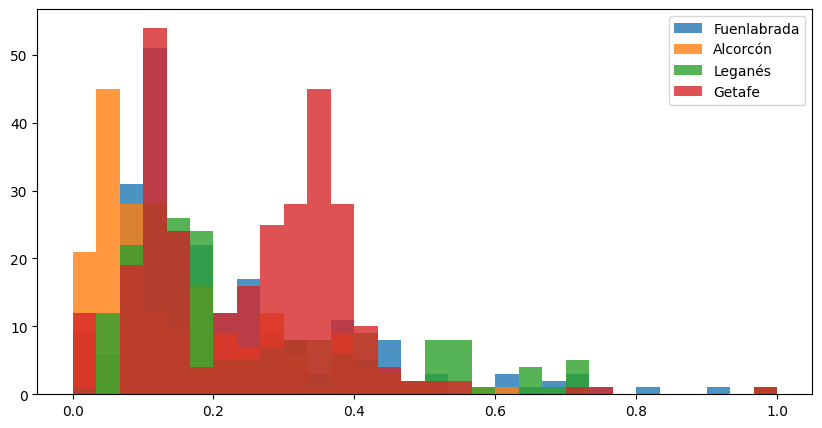

None


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#Normalizar datos con la funcion MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

###Creamos el data frame con a partir del CSV, la separación es ; ###

df_estates = pd.read_csv('assets/real_estate.csv', sep=';')
###Imprimir dirección de la casa más cara y la más barata###

def HighPrice(df):
    #Cogemos el valor más grande de la columna Price (El ultimo en este caso) y lo convertimos en una Serie con squeeze para trabajarlo mejor.
    df_estates_highprice = df.sort_values('price').tail(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_highprice['level7']} es la más cara y su precio es de {df_estates_highprice['price']} €."

def LowPrice(df):
    df_estates_lowprice = df.sort_values('price').head(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_lowprice['level7']} es la más barata y su precio es de {df_estates_lowprice['price']} €."
###Imprimimos la casa más grande y la más pequeña###

def MoreSurface(df):
    df_estates_moresurface = df.sort_values('surface').tail(1).squeeze()
    return f"La casa más grande está en la Calle {df_estates_moresurface['level7']} y su superficie es de {df_estates_moresurface['surface']} metros."

def LessSurface(df):
    df_estates_lesssufrface = df.sort_values('surface').head(1).squeeze()
    return f"La casa más pequeña está en la Calle {df_estates_lesssufrface['level7']} y su superficie es de {df_estates_lesssufrface['surface']} metros."

###Nombre de las poblaciones###

def Populations(df):
    populations = df.level5.squeeze()
    list_population = []
    for i in range(len(populations)):
       list_population.append(populations[i])
    return list_population

### Comprobar si hay valores no admitidos en la lista ###

def NanIdentificy(df):
    cols_nan = df.columns[df.isnull().any()] #Localizamos las columnas con valores NaN
    rows_nan = df[df.isnull().any(axis = 1)][cols_nan] #Localizamos las filas con valores NaN
    return rows_nan.isnull().any() #Solo devolvemos las columnas con valor NaN = True

### Eliminar los NAs del dataset###

def Filter(df):
   df_filter = df.dropna(axis = 1) #Eliminanos solo las columnas porque si eliminamos las filas se borraría todo el DataSet
   return df_filter

###Media de precios de Arroyomolinos###

def MeanArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    return arroyomolinos.price.mean()

###Historiograma de los precios de Arroyomolinos###

def HistogramPriceArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    plt.figure (figsize=(10,5))
    plt.hist (arroyomolinos.price, bins=30, alpha=1)
    plt.title ("Precios de Arroyomolinos (Madrid)")
    plt.show()
    return None

###Comprobar si el precio promedio de Valdemorillo y de Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanEqual(df):
    valdemorillo = df[df['level5'] == "Valdemorillo"]
    galapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo es de {valdemorillo.price.mean()}.\nEl precio medio de Galapagar es de {galapagar.price.mean()}.")
    if valdemorillo.price.mean() == galapagar.price.mean():
        print ("El precio medio de Valdemorillo y Galapagar es igual.")
    elif valdemorillo.price.mean() > galapagar.price.mean():
        print ("El precio medio de Valdemorillo es superior al de Galapagar")
    else:
        print ("El precio medio de Galapagar es superior al de Valdemorillo")
    return None

###Comprobar si el precio/m2 promedio de Valdemorillo y Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanPPSEqual(df):
    pps = df.price / df.surface
    df['pps'] = pps
    ppsValdemorillo = df[df['level5'] == "Valdemorillo"]
    ppsGalapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo por metro cuadrado es de {ppsValdemorillo.pps.mean()}.\nEl precio medio de Galapagar por metro cuadrado es de {ppsGalapagar.pps.mean()}.")
    if ppsValdemorillo.pps.mean() == ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo y Galapagar es el mismo.")
    elif ppsValdemorillo.pps.mean() > ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo es superior al de Galapagar.")
    else:
        print ("El precio medio por metro cuadrado de Galapagar es superior al de Valdemorillo.")
    return None
  
###Analizamos la relación entre el precio y la superficie de las casas.###

def RelPriceSurface(df): #SIN ACABAR
    plt.figure(figsize=(10,5))
    plt.scatter(df.price, df.surface, label = "Precio")

    plt.title("Relación Superficie/Precio")
    plt.legend()
    plt.show()
    return None

###Buscamos cuantas agencias contiene el DataSet###
def HowManyRealEstatesAre(df):
    return len(df.id_realEstates.value_counts()) #Juntamos todas las ID de las Inmobiliarias y devolvemos la longitud.

###Buscamos la población con más cantidad de casas###

def HowCityHaveMoreHouses(df):
    return df.level5.value_counts().head(1)

###Creamos un nuevo DataFrame que contenga Fuenlabrada, Leganes, Getafe y Alcorcón"###

def CinturonSur(df):
    filt_cinturonSur =df['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])
    cinturonsur = df[filt_cinturonSur]
    return cinturonsur

###Grafico de barra de la mediana de los precios de Cinturon Sur###

def CinturonSurMeanPrice(df):
    labels = ["Fuenlabrada","Alcorcón","Leganés","Getafe"]
    fuenlabrada = df[df['level5'] == "Fuenlabrada"].price.mean()
    alcorcon = df[df['level5'] == "Alcorcón"].price.mean()
    leganes = df[df['level5'] == "Leganés"].price.mean()
    getafe = df[df['level5'] == "Getafe"].price.mean()
    values = (fuenlabrada, alcorcon, leganes, getafe)
    plt.figure(figsize=(10,5))
    plt.bar(labels, values)

    plt.title("Precios Medios Cinturón Sur")
    plt.show()

    return None

###Calcula la medía y la varianza de muestra del Cinturón Sur###

def MeanAndVar(df):
    #Para calcular la varianza típica hemos de asegurarnos que ddof es 0.
    
    return f"La media de precios del cinturón sur es de {df.price.mean()} y la varianza de precios es de {df.price.var(ddof = 0)}\nLa media de habitaciones en el cinturón sur es de {df.rooms.mean()} y la varianza es de {df.rooms.var(ddof = 0)}\nLa media de baños en el cinturón sur es de {df.bathrooms.mean()} y la varianza es de {df.bathrooms.var(ddof = 0)}\nLa media de superficie del cinturón sur es de {df.surface.mean()} y la varianza es de {df.surface.var(ddof = 0)}"

def HowIsMostExpensiveHouse(df):
    fuenlabrada = df[df['level5'] == "Fuenlabrada"].sort_values(by = 'price').tail(1).squeeze()
    alcorcon = df[df['level5'] == "Alcorcón"].sort_values(by = 'price').tail(1).squeeze()
    leganes = df[df['level5'] == "Leganés"].sort_values(by = 'price').tail(1).squeeze()
    getafe = df[df['level5'] == "Getafe"].sort_values(by = 'price').tail(1).squeeze()
    return f"La casa más cara de {fuenlabrada.level5} en {fuenlabrada.address} tiene un precio de {fuenlabrada.price} €.\nLa casa más cara de {alcorcon.level5} en {alcorcon.address} tiene un precio de {alcorcon.price} €.\nLa casa más cara de {leganes.level5} en {leganes.address} tiene un precio de {leganes.price} €.\nLa casa más cara de {getafe.level5} en {getafe.address} tiene un precio de {getafe.price} €."

###Historiograma de precios del Cinturon Sur###

def HistogramPriceCinturonSur(df):
    #Formula de normalización: x' = x-xmin/xmax-xmin
    fuenlabrada = df[df['level5'] == "Fuenlabrada"]
    fuenlabrada_scaled = scaler.fit_transform(fuenlabrada[['price']])
    alcorcon = df[df['level5'] == "Alcorcón"]
    alcorcon_scaled =scaler.fit_transform(alcorcon[['price']])
    leganes = df[df['level5'] == "Leganés"]
    leganes_scaled = scaler.fit_transform(leganes[['price']])
    getafe = df[df['level5'] == "Getafe"]
    getafe_scaled = scaler.fit_transform(getafe[['price']])

    #Creamos el Histograma

    plt.figure(figsize=(10,5))
    plt.hist(fuenlabrada_scaled, bins=30, alpha=0.8, label="Fuenlabrada")
    plt.hist(alcorcon_scaled,bins=30, alpha=0.8, label="Alcorcón")
    plt.hist(leganes_scaled, bins=30, alpha=0.8, label="Leganés")
    plt.hist(getafe_scaled, bins=30, alpha=0.8, label="Getafe")

    plt.legend()
    plt.show()

    return None 

#########Ejercicios########

#Ejercicio1
#print (HighPrice(df_estates))

#Ejercicio2
#print (LowPrice(df_estates))

#Ejercicio3.1
#print (MoreSurface(df_estates))

#Ejercicio3.2
#print (LessSurface(df_estates))

#Ejercicio4
#print (Populations(df_estates))

#Ejercicio5
#print (NanIdentificy(df_estates))

#Ejercicio6
#print(Filter(df_estates))
#print (df_estates)

#Ejercicio7
#print(MeanArroyomolinos(df_estates))

#Ejercicio8
#print(HistogramPriceArroyomolinos(df_estates))

#Ejercicio9
#print (IsValdemorilloAndGalapagarMeanEqual(df_estates))

#Ejercicio10
#print (IsValdemorilloAndGalapagarMeanPPSEqual(df_estates))

#Ejercicio11
#print (RelPriceSurface(df_estates))

#Ejercicio12
#print (HowManyRealEstatesAre(df_estates))

#Ejercicio13
#print(HowCityHaveMoreHouses(df_estates))

#Ejercicio14
CinturonSur(df_estates)

#Ejercicio15
#print(CinturonSurMeanPrice(CinturonSur(df_estates)))

#Ejercicio16
#print (MeanAndVar(CinturonSur(df_estates)))

#Ejercicio17
#print (HowIsMostExpensiveHouse(CinturonSur(df_estates)))

#Ejercicio18
print(HistogramPriceCinturonSur(CinturonSur(df_estates)))

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
